<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv7-Zomeb0dy/blob/main/DataAnalyzedBlindSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://raw.githubusercontent.com/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv7-Zomeb0dy/main/Sample7.csv',delimiter=',')
particles.head()
#Datos a Utilizar:
print(particles)

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
0     163286  109060857  37.5667  2.2892  2.0526  -1    EE        0.0251   
1     163286  109275715  36.2901 -0.8373 -1.5859   1    EB        0.0078   
2     163286  109075352  25.9705 -0.6974  1.6360  -1    EB        0.0097   
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
4     163286  108947653  39.8985 -0.5927 -2.3947   1    EB        0.0153   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9995  172802  321346368  78.2172 -1.9934  0.4082   1    EE        0.0179   
9996  172802  321385402  28.0339  0.3626  1.8235   1    EB        0.0100   
9997  172802  321425209  41.7475  0.9181 -1.7749  -1    EB        0.0076   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   
9999  172802  321783962  38.8685  1.6938 -1.1747  -1    EE        0.0119   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
0      0.0090     

In [ ]:
#Información sobre los datos a anaizar
particles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           10000 non-null  int64  
 1   Event         10000 non-null  int64  
 2   pt1           10000 non-null  float64
 3   eta1          10000 non-null  float64
 4   phi1          10000 non-null  float64
 5   Q1            10000 non-null  int64  
 6   type1         10000 non-null  object 
 7   sigmaEtaEta1  10000 non-null  float64
 8   HoverE1       10000 non-null  float64
 9   isoTrack1     10000 non-null  float64
 10  isoEcal1      10000 non-null  float64
 11  isoHcal1      10000 non-null  float64
 12  pt2           10000 non-null  float64
 13  eta2          10000 non-null  float64
 14  phi2          10000 non-null  float64
 15  Q2            10000 non-null  int64  
 16  type2         10000 non-null  object 
 17  sigmaEtaEta2  10000 non-null  float64
 18  HoverE2       10000 non-nul

In [ ]:
#FILTRO |ETA| < 2.4
FETA = particles[(abs(particles['eta1']) < 2.4) & ((abs(particles['eta1']) <  2.4))]
print(FETA)
print(f"Número de eventos con Q1 ≠ Q2 y EB: {len(FETA)}")

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
0     163286  109060857  37.5667  2.2892  2.0526  -1    EE        0.0251   
1     163286  109275715  36.2901 -0.8373 -1.5859   1    EB        0.0078   
2     163286  109075352  25.9705 -0.6974  1.6360  -1    EB        0.0097   
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
4     163286  108947653  39.8985 -0.5927 -2.3947   1    EB        0.0153   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9995  172802  321346368  78.2172 -1.9934  0.4082   1    EE        0.0179   
9996  172802  321385402  28.0339  0.3626  1.8235   1    EB        0.0100   
9997  172802  321425209  41.7475  0.9181 -1.7749  -1    EB        0.0076   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   
9999  172802  321783962  38.8685  1.6938 -1.1747  -1    EE        0.0119   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
0      0.0090     

In [ ]:
#ETA ETA
#A1 = max(particles['eta1'])
#A2 = max(particles['eta2'])
#B1 = min(particles['eta1'])
#B2 = min(particles['eta2'])
#print(A1)
#print(A2)
#print(B1)
#print(B2)
fig = px.scatter(particles,
                 x='eta1',
                 y='eta2',
                 title='Relación entre Eta1 y Eta2',
                 labels={'Eta1': 'Pseudorapidez η₁', 'Eta2': 'Pseudorapidez η₂'},
                 opacity=0.5,
                 template='plotly_white',
                 width=800,
                 height=600)

fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
#FILTRO ETA ETA ANTES DE CARGAS A LO LOCO
#Filtro EB
FTYPE = particles[(particles['type1'] == 'EB') & ((particles['type2'] == 'EB'))]
print(FTYPE)
print(f"Número de eventos con Q1 ≠ Q2 y EB: {len(FTYPE)}")

fig = px.scatter(FTYPE,
                 x='eta1',
                 y='eta2',
                 title='Relación entre Eta1 y Eta2',
                 labels={'Eta1': 'Pseudorapidez η₁', 'Eta2': 'Pseudorapidez η₂'},
                 opacity=0.5,
                 template='plotly_white',
                 width=800,
                 height=600)

fig.update_layout(title_x=0.5)
fig.show()

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
1     163286  109275715  36.2901 -0.8373 -1.5859   1    EB        0.0078   
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
8     163286  110268001  32.3642 -0.5340 -2.6718  -1    EB        0.0109   
9     163286  110085994  31.4123 -0.2164  1.2954  -1    EB        0.0118   
10    163286  110297282  27.4283  0.5552 -1.4774  -1    EB        0.0112   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9991  172802  321438560  39.0763 -0.3372 -2.4361  -1    EB        0.0090   
9993  172802  321296163  60.4391  0.5949  1.6320   1    EB        0.0086   
9994  172802  321530508  31.6160  0.4775 -0.5585  -1    EB        0.0088   
9996  172802  321385402  28.0339  0.3626  1.8235   1    EB        0.0100   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
1      0.0438     

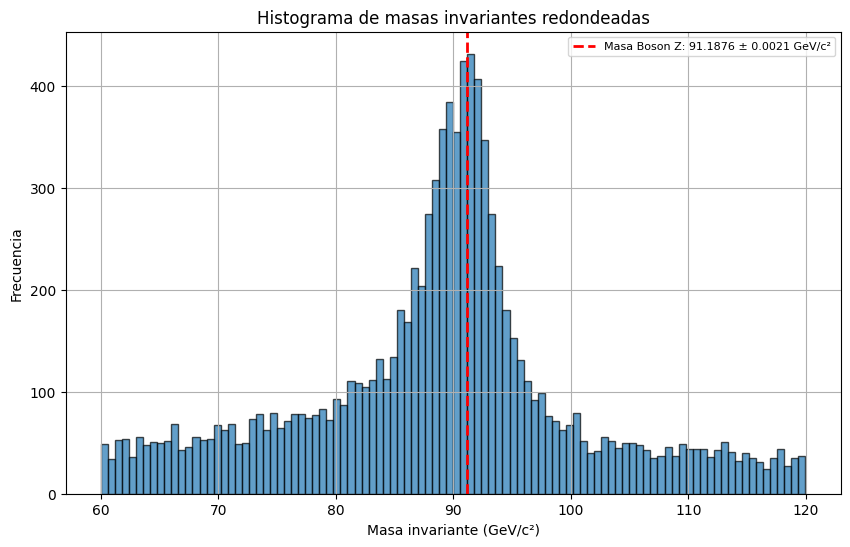

In [ ]:
#Histograma de Masas para los Datos puros

# Crear la lista de masas invariantes (sin redondear)
M_i = np.sqrt( 2 * particles['pt1'] * particles['pt2'] * (np.cosh(particles['eta1'] - particles['eta2']) - np.cos(particles['phi1'] - particles['phi2'])))

# Crear la lista de masas redondeadas
masas_redondeadas = np.round(M_i).tolist()

# Crear el histograma de las masas redondeadas
plt.figure(figsize=(10, 6))
plt.hist(M_i, bins=100, edgecolor='black', alpha=0.7)

plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Boson Z: 91.1876 ± 0.0021 GeV/c²')
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes redondeadas')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

fig = px.histogram(
    x=masas_redondeadas,
    nbins=50,
    labels={'x': 'Masa invariante redondeada (GeV/c²)', 'y': 'Número de eventos'},
    title='Distribución de la masa invariante (Q1 ≠ Q2)',
    color_discrete_sequence=['indigo']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
#línea de referencia para el bosón Z (~91 GeV)
fig.update_layout(
    xaxis_title='Masa [GeV/c²]',
    yaxis_title='Eventos',
    showlegend=False
)
fig.show()

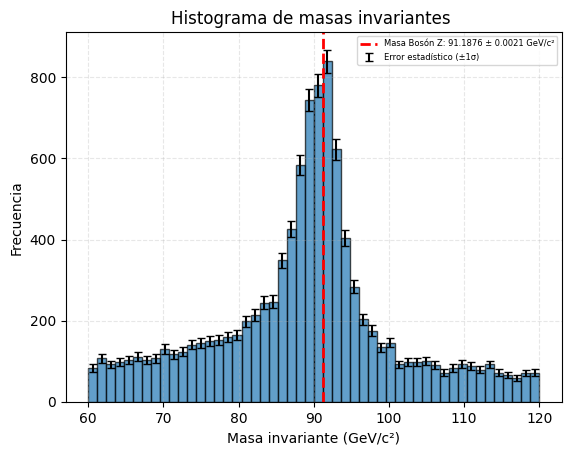

In [ ]:
# Calcular las masas invariantes
M_i = np.sqrt(2 * particles['pt1'] * particles['pt2'] *
              (np.cosh(particles['eta1'] - particles['eta2']) -
               np.cos(particles['phi1'] - particles['phi2'])))

# Redondear y crear histograma
masas_redondeadas = np.round(M_i)
bin_counts, bin_edges, _ = plt.hist(M_i, bins=50, edgecolor='black', alpha=0.7)

# Calcular errores estadísticos (Poisson: sqrt(N))
bin_errors = np.sqrt(bin_counts)

# Graficar con barras de error
plt.errorbar(
    x=(bin_edges[:-1] + bin_edges[1:]) / 2,  # Centro del bin
    y=bin_counts,
    yerr=bin_errors,
    fmt='none',  # Sin línea conectando puntos
    ecolor='black',  # Color de las barras de error
    capsize=3,    # Tamaño de las "tapas" de las barras
    label='Error estadístico (±1σ)'
)

# Crear el histograma de las masas redondeadas
fig = px.histogram(
    x=M_i,
    nbins=1000,
    labels={'x': 'Masa invariante redondeada (GeV/c²)', 'y': 'Número de eventos'},
    title='Distribución de la masa invariante (Q1 ≠ Q2)',
    color_discrete_sequence=['indigo']
)
fig.add_vline(x=91, line_dash="dash", line_color="red", annotation_text="Masa del Z (91 GeV)")
#línea de referencia para el bosón Z (~91 GeV)
fig.update_layout(
    xaxis_title='Masa [GeV/c²]',
    yaxis_title='Eventos',
    showlegend=False
)
#systematic_error = 0.05 * bin_counts

#plt.fill_between(
    #x=(bin_edges[:-1] + bin_edges[1:]) / 2,
    #y1=bin_counts - systematic_error,
    #y2=bin_counts + systematic_error,
    #color='gray',
    #alpha=0.3,
    #label='Error sistemático (2%)'
#)

# Línea vertical para la masa del bosón Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
            label='Masa Bosón Z: 91.1876 ± 0.0021 GeV/c²')

# Ajustes estéticos
fig.show()
plt.xlabel('Masa invariante (GeV/c²)')
plt.ylabel('Frecuencia')
plt.title('Histograma de masas invariantes ')
plt.legend(fontsize=6)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

CARGAS

In [ ]:
#Conteo de datos para cada carga
A = FETA['Q1'].value_counts()
print(A)
B = FETA['Q2'].value_counts()
print(B)

#Conteo de eventos con carga diferente (mejores candidatos a Bosones Z)
eventos_diferentes =FETA[FETA['Q1'] != FETA['Q2']]
print("Eventos con Q1 ≠ Q2:")
print(eventos_diferentes.head())
print("Número de eventos con cargas diferentes:", len(eventos_diferentes))

#Conteo de eventos con carga iguales (Malos candidatos a Bosones Z)
eventos_iguales = FETA[FETA['Q1'] == FETA['Q2']]
print("Eventos con Q1 = Q2:")
print(eventos_iguales.head())
print("Número de eventos con cargas iguales:", len(eventos_iguales))

T = len(eventos_iguales)*100/10000
print("Porcentaje de eventos con carga igual en la base de datos",T)

Q1
 1    5013
-1    4827
Name: count, dtype: int64
Q2
-1    4965
 1    4875
Name: count, dtype: int64
Eventos con Q1 ≠ Q2:
      Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
0  163286  109060857  37.5667  2.2892  2.0526  -1    EE        0.0251   
1  163286  109275715  36.2901 -0.8373 -1.5859   1    EB        0.0078   
2  163286  109075352  25.9705 -0.6974  1.6360  -1    EB        0.0097   
3  163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
4  163286  108947653  39.8985 -0.5927 -2.3947   1    EB        0.0153   

   HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  sigmaEtaEta2  \
0   0.0090     0.0000  ...  45.4315  1.4706 -1.1630   1     EB        0.0008   
1   0.0438     0.0000  ...  60.5754 -0.4896  1.0496  -1     EB        0.0112   
2   0.0407     6.2870  ...  45.2954 -2.0401  3.1187   1     EE        0.0260   
3   0.0000     0.0000  ...  45.9013  1.1561  2.4786  -1     EB        0.0086   
4   0.0000     2.5435  ...  34.8931 -2

In [ ]:
#Histograma diferenciación de cargas
fig = px.histogram(
    particles,
    x='Q1',
    color='Q2',
    barmode='group',
    title="Distribución de cargas Q1 vs Q2",
    labels={'Q1': ' Q1', 'Q2': 'Q2'},
    opacity=0.8,
    nbins=20,
    template='plotly_white',
    width=1000,
    height=600,
).update_layout(
    bargap=0.1,
    legend_title_text='Signo de la Carga Q2',
    xaxis_title="Distribución de cargas para Q1 y Q2",
    yaxis_title="Frecuencia",
    title_x=0.5
)

# Añadir anotaciones con flechas para cada barra
# Necesitarás conocer las posiciones x de tus barras y sus alturas
# Esto es un ejemplo - ajusta los valores según tus datos reales

#annotations = [
    #dict(
        #x=x_pos,  # Posición x de la barra
        #y=y_pos,  # Altura de la barra + un offset
        #xref="x",
        #yref="y",
        #text="Tu etiqueta aquí",  # Texto de la etiqueta
        #showarrow=True,
        #arrowhead=2,
        #ax=0,  # Desplazamiento x de la punta de la flecha
        #ay=-40  # Desplazamiento y (negativo para flecha hacia arriba)
    #)
    #for x_pos, y_pos in [(bar_x1, bar_y1), (bar_x2, bar_y2), ...]  # Sustituye con tus valores
#]
#fig.update_layout(annotations=annotations)
fig.show()

FILTRO POR TIPO

In [ ]:
#Filtro EB
Filtro_EB = eventos_diferentes[(eventos_diferentes['type1'] == 'EB') & ((eventos_diferentes['type2'] == 'EB'))]
print(Filtro_EB)
print(f"Número de eventos con Q1 ≠ Q2 y EB: {len(Filtro_EB)}")
M_i1 = np.sqrt(2 *Filtro_EB['pt1'] * Filtro_EB['pt2'] *
              (np.cosh(Filtro_EB['eta1'] - Filtro_EB['eta2']) -
               np.cos(Filtro_EB['phi1'] - Filtro_EB['phi2'])))

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
1     163286  109275715  36.2901 -0.8373 -1.5859   1    EB        0.0078   
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
8     163286  110268001  32.3642 -0.5340 -2.6718  -1    EB        0.0109   
10    163286  110297282  27.4283  0.5552 -1.4774  -1    EB        0.0112   
13    163286  110106153  38.5802 -0.7728 -1.5797  -1    EB        0.0087   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9991  172802  321438560  39.0763 -0.3372 -2.4361  -1    EB        0.0090   
9993  172802  321296163  60.4391  0.5949  1.6320   1    EB        0.0086   
9994  172802  321530508  31.6160  0.4775 -0.5585  -1    EB        0.0088   
9996  172802  321385402  28.0339  0.3626  1.8235   1    EB        0.0100   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
1      0.0438     

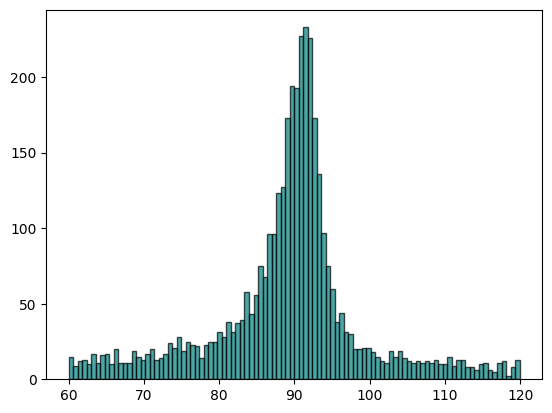

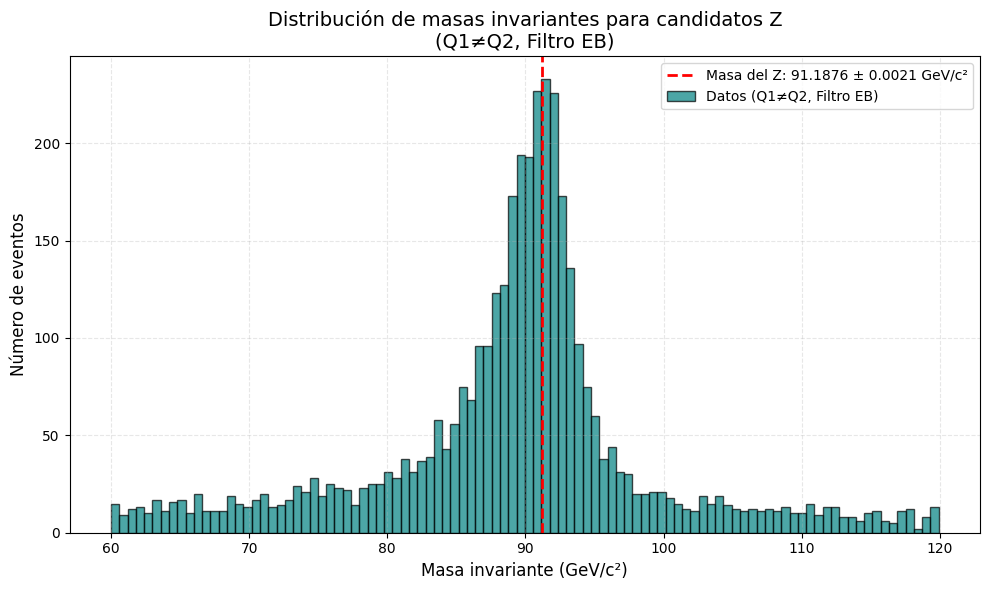

In [ ]:
#Error ISO_r
# Calcular errores estadísticos (Poisson: √N)
M_R1 = np.round(M_i1)
counts, bins, _ = plt.hist(M_i1, bins=100, color='teal', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='teal', edgecolor='black', alpha=0.7,
       label='Datos (Q1≠Q2, Filtro EB)')

# Añadir barras de error
#plt.errorbar(bin_centers, counts, yerr=errors,
            #fmt='none', ecolor='darkred', capsize=3,
            #label='Error estadístico (±1σ)')

# Línea de la masa del Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z: 91.1876 ± 0.0021 GeV/c²')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Distribución de masas invariantes para candidatos Z\n(Q1≠Q2, Filtro EB)', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

FILTRO HOVER


In [ ]:
#Filtro H
#Filtro_EB = eventos_diferentes[(eventos_diferentes['type1'] == 'EB') & ((eventos_diferentes['type2'] == 'EB'))]
#hovere1_quantile = Filtro_EB['HoverE1'].quantile(0.1)hovere2_quantile = Filtro_EB['HoverE2'].quantile(0.1)

Filtro_H = Filtro_EB[(Filtro_EB['HoverE1'] < 0.05) & (Filtro_EB['HoverE2'] < 0.05)]
print(Filtro_H)

print(f"Número de eventos con Q1 ≠ Q2, EB, Hover < 0.05: {len(Filtro_H)}")
M_i2 = np.sqrt(2 *Filtro_H['pt1'] * Filtro_H['pt2'] *
              (np.cosh(Filtro_H['eta1'] - Filtro_H['eta2']) -
               np.cos(Filtro_H['phi1'] - Filtro_H['phi2'])))

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
1     163286  109275715  36.2901 -0.8373 -1.5859   1    EB        0.0078   
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
10    163286  110297282  27.4283  0.5552 -1.4774  -1    EB        0.0112   
13    163286  110106153  38.5802 -0.7728 -1.5797  -1    EB        0.0087   
22    163286  111133569  35.3177 -0.0196  2.7516   1    EB        0.0105   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9989  172802  321014892  50.1342  0.4924 -2.2113   1    EB        0.0085   
9991  172802  321438560  39.0763 -0.3372 -2.4361  -1    EB        0.0090   
9993  172802  321296163  60.4391  0.5949  1.6320   1    EB        0.0086   
9996  172802  321385402  28.0339  0.3626  1.8235   1    EB        0.0100   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
1      0.0438     

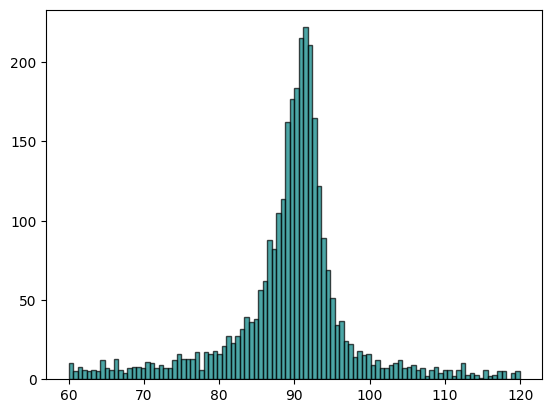

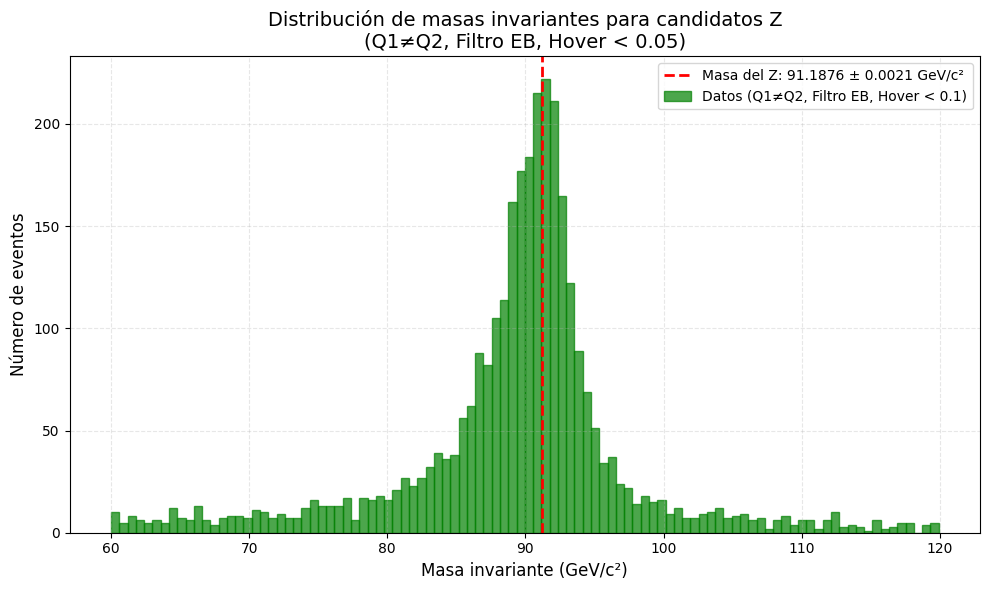

In [ ]:
#Error ISO_r
# Calcular errores estadísticos (Poisson: √N)
M_R2 = np.round(M_i2)
counts, bins, _ = plt.hist(M_i2, bins= 100, color='teal', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='green', edgecolor='green', alpha=0.7,
       label='Datos (Q1≠Q2, Filtro EB, Hover < 0.1)')

# Añadir barras de error
#plt.errorbar(bin_centers, counts, yerr=errors,
            ##fmt='none', ecolor='darkred', capsize= 0.1,
            #label='Error estadístico (±1σ)')

# Línea de la masa del Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z: 91.1876 ± 0.0021 GeV/c²')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Distribución de masas invariantes para candidatos Z\n(Q1≠Q2, Filtro EB, Hover < 0.05)', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

 FILTRO ISO (ECAL + Hcal + track)

In [ ]:
# Filtrar eventos con Iso Relativo:
iso1 = Filtro_H['isoTrack1'] + Filtro_H['isoEcal1'] + Filtro_H['isoHcal1']
iso2 = Filtro_H['isoTrack2'] + Filtro_H['isoEcal2'] + Filtro_H['isoHcal2']

filtro_ISOR = Filtro_H[
    (iso1 / Filtro_H['pt1'] < 0.15) &
    (iso2 / Filtro_H['pt2'] < 0.15)
]

# Calcular la masa invariante para estos eventos
M_i4 = np.sqrt(
    2 * filtro_ISOR['pt1'] * filtro_ISOR['pt2'] *
    (np.cosh(filtro_ISOR['eta1'] - filtro_ISOR['eta2']) -
     np.cos(filtro_ISOR['phi1'] - filtro_ISOR['phi2']))
)

print(filtro_ISOR)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2, EB, Hover < 0.05 y ISO_r < 0.15: {len(filtro_ISOR)}")

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
1     163286  109275715  36.2901 -0.8373 -1.5859   1    EB        0.0078   
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
13    163286  110106153  38.5802 -0.7728 -1.5797  -1    EB        0.0087   
22    163286  111133569  35.3177 -0.0196  2.7516   1    EB        0.0105   
40    163286  112128579  46.4312  0.1925  0.6714  -1    EB        0.0092   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9982  172802  320717144  43.0123 -0.0606 -0.6826   1    EB        0.0134   
9985  172802  320122981  28.9084 -0.7120  0.9993  -1    EB        0.0093   
9989  172802  321014892  50.1342  0.4924 -2.2113   1    EB        0.0085   
9991  172802  321438560  39.0763 -0.3372 -2.4361  -1    EB        0.0090   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
1      0.0438     

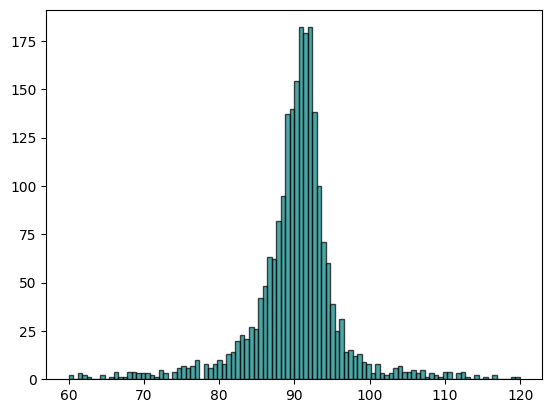

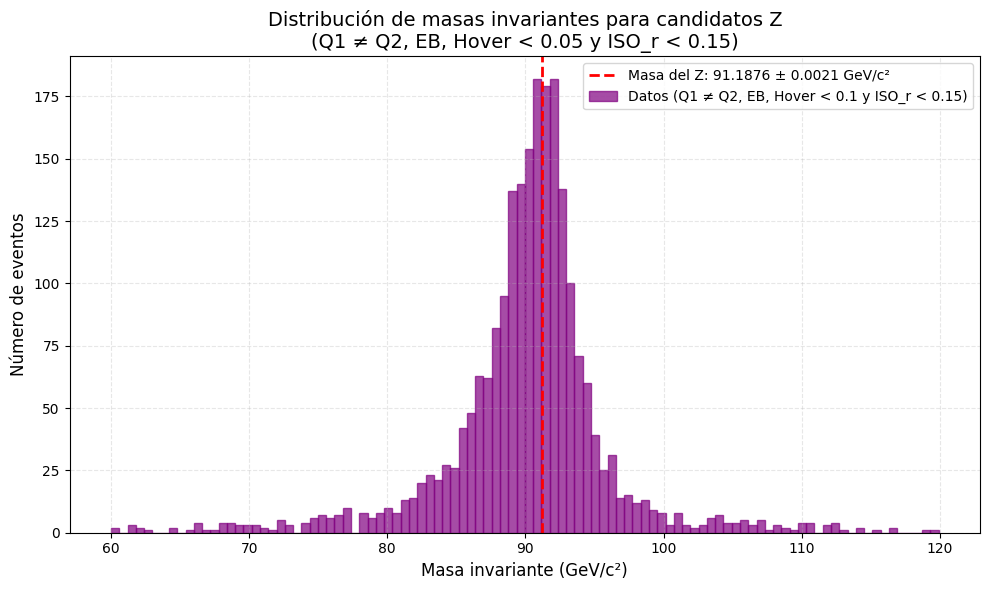

In [ ]:
#HISTO UWU
#Error ISO_r
# Calcular errores estadísticos (Poisson: √N)
M_R4 = np.round(M_i4)
counts, bins, _ = plt.hist(M_i4, bins= 100, color='teal', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='purple', edgecolor='purple', alpha=0.7,
       label='Datos (Q1 ≠ Q2, EB, Hover < 0.1 y ISO_r < 0.15)')

# Añadir barras de error
#plt.errorbar(bin_centers, counts, yerr=errors,
            ##fmt='none', ecolor='darkred', capsize= 0.1,
            #label='Error estadístico (±1σ)')

# Línea de la masa del Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z: 91.1876 ± 0.0021 GeV/c²')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Distribución de masas invariantes para candidatos Z\n(Q1 ≠ Q2, EB, Hover < 0.05 y ISO_r < 0.15)', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

FILTRO BACK TO BACK

In [ ]:
#Definicion de Deltaphi
D_phi = np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2'])
filtro_Dp = filtro_ISOR[
    (np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2']) < 3.2) &
    (np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2']) > 2.9)
]

# Calcular la masa invariante para estos eventos
M_i5 = np.sqrt(
    2 * filtro_Dp['pt1'] * filtro_Dp['pt2'] *
    (np.cosh(filtro_Dp['eta1'] - filtro_Dp['eta2']) -
     np.cos(filtro_Dp['phi1'] - filtro_Dp['phi2']))
)

print(filtro_Dp)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2, EB, Hover < 0.05 y ISO_r < 0.15 y BtB in [2.9,3.2]: {len(filtro_Dp)}")

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
13    163286  110106153  38.5802 -0.7728 -1.5797  -1    EB        0.0087   
22    163286  111133569  35.3177 -0.0196  2.7516   1    EB        0.0105   
48    163286  113125184  42.5004  0.4887 -0.6357   1    EB        0.0098   
50    163286  112816146  41.4244 -0.2164 -2.3486  -1    EB        0.0075   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9977  172802  319754673  44.7731 -0.5064  0.9152   1    EB        0.0093   
9982  172802  320717144  43.0123 -0.0606 -0.6826   1    EB        0.0134   
9985  172802  320122981  28.9084 -0.7120  0.9993  -1    EB        0.0093   
9991  172802  321438560  39.0763 -0.3372 -2.4361  -1    EB        0.0090   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
3      0.0000     

In [ ]:
#PHI PHI PA VER Q ONDA
fig = px.scatter(particles,
                 x='phi1',
                 y='phi2',
                 title='Relación entre Phi1 y Phi',
                 labels={'Phi1', 'Eta2'},
                 opacity=0.5,
                 template='plotly_white',
                 width=800,
                 height=600)

fig.update_layout(title_x=0.5)
fig.show()
fig = px.scatter(filtro_Dp,
                 x='phi1',
                 y='phi2',
                 title='Relación entre Phi1 y Phi',
                 labels={'Phi1', 'Eta2'},
                 opacity=0.5,
                 template='plotly_white',
                 width=800,
                 height=600)

fig.update_layout(title_x=0.5)
fig.show()

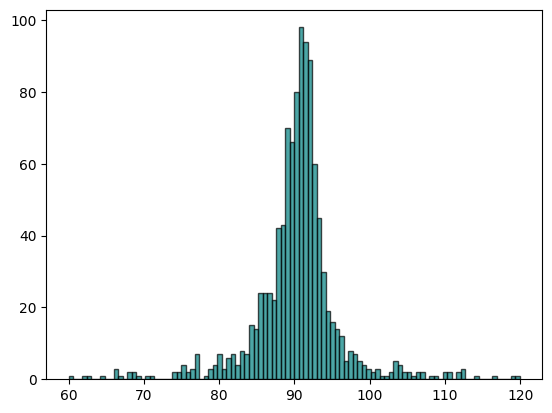

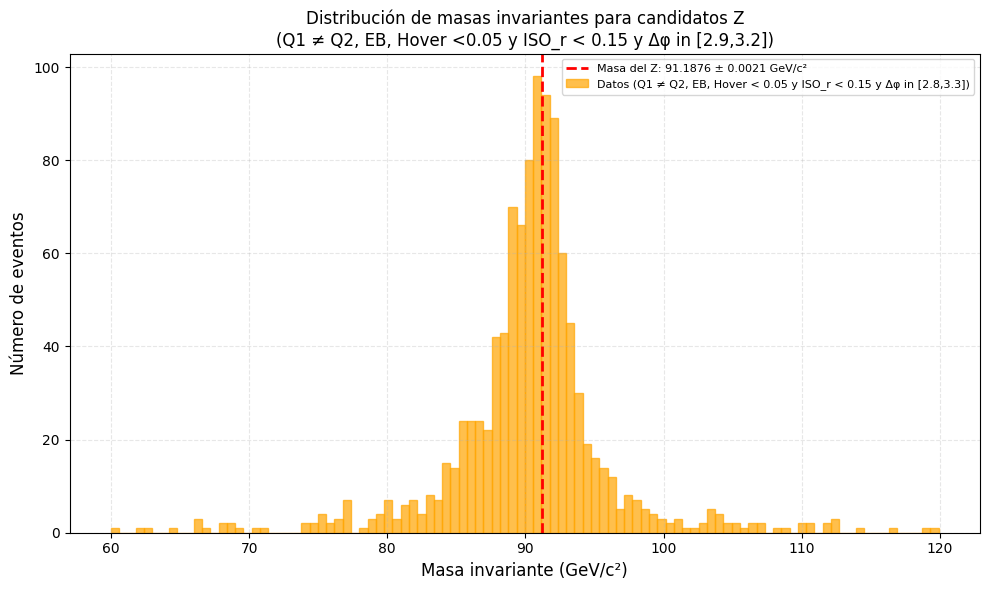

In [ ]:
#HISTOGRAMIN DELTA PHI

M_R5 = np.round(M_i5)
counts, bins, _ = plt.hist(M_i5, bins= 100, color='teal', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='orange', edgecolor='orange', alpha=0.7,
       label='Datos (Q1 ≠ Q2, EB, Hover < 0.05 y ISO_r < 0.15 y Δφ in [2.8,3.3])')

# Añadir barras de error
#plt.errorbar(bin_centers, counts, yerr=errors,
            ##fmt='none', ecolor='darkred', capsize= 0.1,
            #label='Error estadístico (±1σ)')

# Línea de la masa del Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z: 91.1876 ± 0.0021 GeV/c²')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Distribución de masas invariantes para candidatos Z\n(Q1 ≠ Q2, EB, Hover <0.05 y ISO_r < 0.15 y Δφ in [2.9,3.2])', fontsize=12)
plt.legend(fontsize=8, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

SigmaETAETA

In [ ]:
#Definicion de Deltaphi
#D_ETAETA = np.abs(filtro_ISOR['phi1'] - filtro_ISOR['phi2'])
F_ETAETA = filtro_Dp[
    (filtro_Dp['sigmaEtaEta1'] < 0.011) &
    (filtro_Dp['sigmaEtaEta2'] < 0.011)
]

# Calcular la masa invariante para estos eventos
M_i6 = np.sqrt(
    2 * F_ETAETA['pt1'] * F_ETAETA['pt2'] *
    (np.cosh(F_ETAETA['eta1'] - F_ETAETA['eta2']) -
     np.cos(F_ETAETA['phi1'] - F_ETAETA['phi2']))
)

print(F_ETAETA)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2, EB, Hover < 0.05 y ISO_r < 0.15 y BtB in [2.9,3.2]: {len(F_ETAETA)}")

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
13    163286  110106153  38.5802 -0.7728 -1.5797  -1    EB        0.0087   
22    163286  111133569  35.3177 -0.0196  2.7516   1    EB        0.0105   
48    163286  113125184  42.5004  0.4887 -0.6357   1    EB        0.0098   
50    163286  112816146  41.4244 -0.2164 -2.3486  -1    EB        0.0075   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9976  172802  319604552  46.2198 -0.0047 -2.8675   1    EB        0.0103   
9977  172802  319754673  44.7731 -0.5064  0.9152   1    EB        0.0093   
9985  172802  320122981  28.9084 -0.7120  0.9993  -1    EB        0.0093   
9991  172802  321438560  39.0763 -0.3372 -2.4361  -1    EB        0.0090   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
3      0.0000     

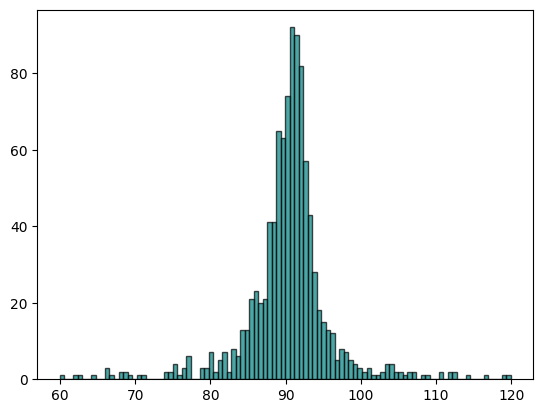

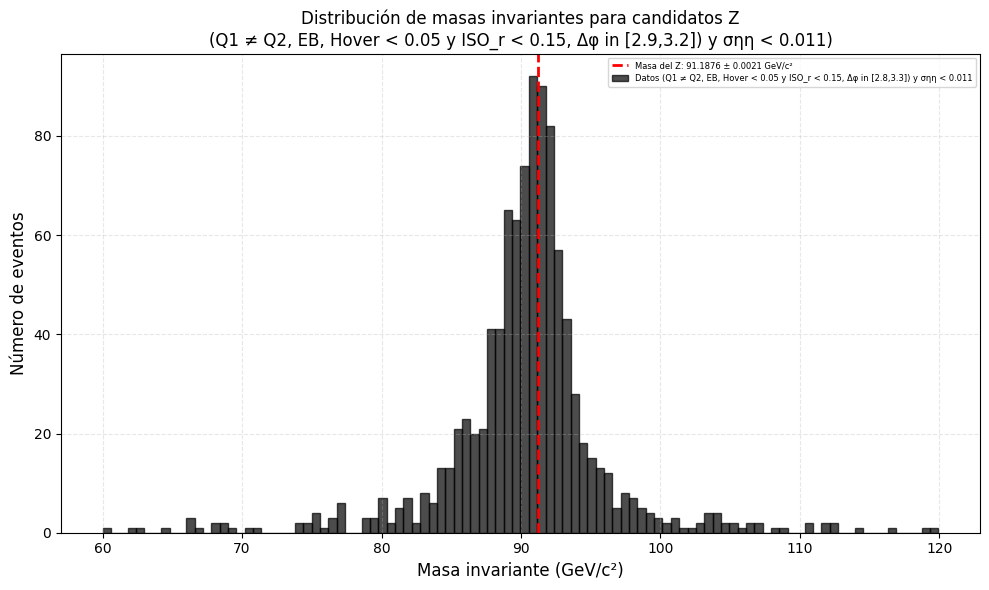

In [ ]:
#HISTOGRAMIN FINAL

M_R6 = np.round(M_i6)
counts, bins, _ = plt.hist(M_i6, bins= 100, color='teal', edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Centro de cada bin
errors = np.sqrt(counts)  # Error estadístico

# Graficar histograma con errores
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='black', edgecolor='black', alpha=0.7,
       label='Datos (Q1 ≠ Q2, EB, Hover < 0.05 y ISO_r < 0.15, Δφ in [2.8,3.3]) y σηη < 0.011')

# Añadir barras de error
#plt.errorbar(bin_centers, counts, yerr=errors,
            ##fmt='none', ecolor='darkred', capsize= 0.1,
            #label='Error estadístico (±1σ)')

# Línea de la masa del Z
plt.axvline(91.2, color='red', linestyle='dashed', linewidth=2,
           label='Masa del Z: 91.1876 ± 0.0021 GeV/c²')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Distribución de masas invariantes para candidatos Z\n(Q1 ≠ Q2, EB, Hover < 0.05 y ISO_r < 0.15, Δφ in [2.9,3.2]) y σηη < 0.011)', fontsize=12)
plt.legend(fontsize=6, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

AJUSTE BREIT-WIGNER

In [ ]:
#Histogram
masas = M_R6 #AQUI COLOCAN SUS DATOS
bin_w = 1.0

lo_edge = np.floor(masas.min() / bin_w) * bin_w
hi_edge = np.ceil (masas.max() / bin_w) * bin_w
bins = np.arange(lo_edge, hi_edge + bin_w, bin_w)
counts, edges = np.histogram(masas, bins=bins)
centros = 0.5 * (edges[:-1] + edges[1:])

#Breit-Wigner
def breit_wigner(m, M, Gamma):
    num = M**2 * Gamma**2
    denom = (m**2 - M**2)**2 + M**2 * Gamma**2
    return num / denom
#Normalizamos
def modelo(m, M, Gamma, N, a, b):
    return N * breit_wigner(m, M, Gamma)+ a + b * m

from scipy.optimize import curve_fit # Import curve_fit

mask = (centros > 80) & (centros < 100)
x_fit = centros[mask]
y_fit = counts[mask]
sigma = np.sqrt(np.where(y_fit > 0, y_fit, 1))

p0 = [91.2, 2.5, y_fit.max()*5, y_fit.min(), 0.0]

popt, pcov = curve_fit(modelo, x_fit, y_fit, p0=p0, sigma=sigma, absolute_sigma=True, maxfev=10000)

M_Z, Gamma_Z, N_sig, a_bg, b_bg = popt
dM_Z, dGamma_Z = np.sqrt(np.diag(pcov))[:2]

print(f"M_Z = {M_Z:.3f} ± {dM_Z:.3f} GeV") #IMPRIME EL PICO
print(f"Gamma_Z = {Gamma_Z:.3f} ± {dGamma_Z:.3f} GeV") #IMPRIME EL ANCHO

#Creamos figura
m_plot = np.linspace(lo_edge, hi_edge, 2000)
total_y = modelo(m_plot, *popt)
signal_y = N_sig * breit_wigner(m_plot, M_Z, Gamma_Z)

# Agregando errores estadísticos al gráfico
hist_with_errors = go.Histogram(
    x=masas,
    xbins=dict(start=lo_edge, end=hi_edge, size=bin_w),
    name="Datos",
    opacity=0.75,
    marker=dict(color="rgba(0,0,200,0.65)"),
    error_y=dict(
        type='sqrt',  # Error Poisson (√N)
        array=np.sqrt(counts),
        visible=True,
        color='rgba(100,100,100,0.8)'
    )
)

hist = go.Histogram(
    x=masas,
    xbins=dict(start=lo_edge, end=hi_edge, size=bin_w),
    name="Datos",
    opacity=0.75,
    marker=dict(color="rgba(0,0,200,0.65)")
)

total_fit = go.Scatter(
    x=m_plot, y=total_y,
    mode="lines", name="Ajuste total",
    line=dict(color="orange"))
signal_Z = go.Scatter(
    x=m_plot, y=signal_y,
    mode="lines", name="Señal Z",
    line=dict(color="green", dash="dash"))

#fig = go.Figure(data=[hist, total_fit, signal_Z])
# Creando figura con todos los elementos
fig = go.Figure(data=[hist_with_errors, total_fit, signal_Z])

 #Añadiendo línea vertical para la masa del Z
fig.add_vline(
    x=91.1876,
    line_dash="dot",
    line_color="red",
    annotation_text=f"Z: {M_Z:.2f} ± {dM_Z:.2f} GeV",
    annotation_position="top right"
)



fig.update_layout(
    title="Masa invariante e⁺e⁻ con ajuste Breit-Wigner",
    xaxis_title="Masa invariante [GeV/c²]",
    yaxis_title=f"Eventos / {bin_w} GeV",
    bargap=0.05,
    template="plotly_white",
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02)
)
fig.show()

M_Z = 91.327 ± 0.105 GeV
Gamma_Z = 4.626 ± 0.363 GeV


AJUSTE 2 OWO

Ajuste Breit-Wigner: A = 163.60 ± 6.64, M_Z = 91.26 ± 0.11 GeV/c², Γ = 4.27 ± 0.26 GeV


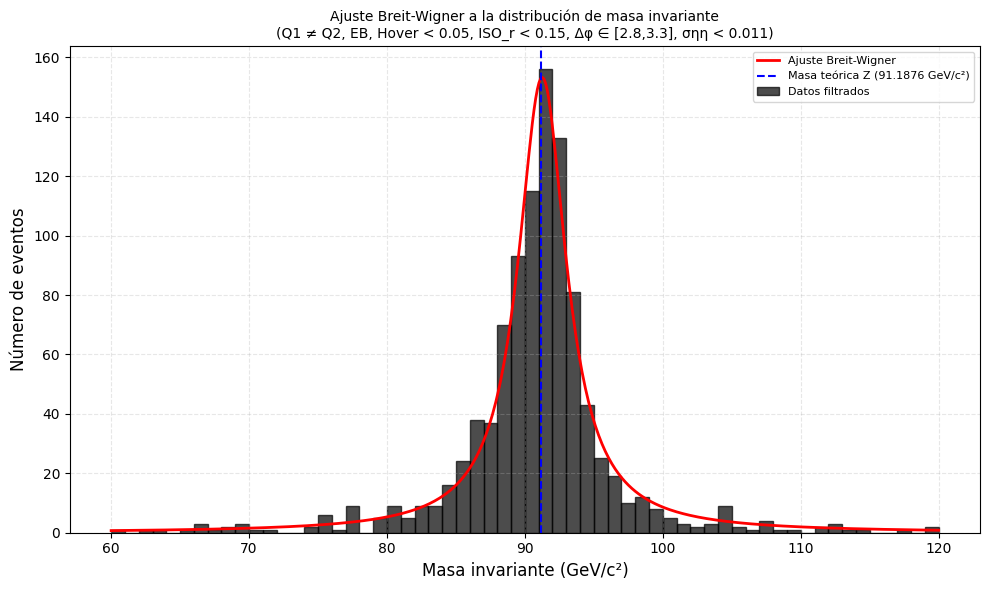

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def breit_wigner(M, A, M_Z, Gamma):
    # Corrected Breit-Wigner function with proper normalization factor
    return A * Gamma / ((M - M_Z)**2 + (Gamma/2)**2)

# Data for the histogram (from previous steps, using M_i6)
masas = M_R6
bin_w = 1.0
lo_edge = np.floor(masas.min() / bin_w) * bin_w
hi_edge = np.ceil(masas.max() / bin_w) * bin_w
bins = np.arange(lo_edge, hi_edge + bin_w, bin_w)

# Calculate counts and bin edges using numpy.histogram
counts, edges = np.histogram(masas, bins=bins)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Calculate statistical errors (Poisson: sqrt(N))
errors = np.sqrt(counts)

# Apply the mask consistently
mask = (bin_centers > 80) & (bin_centers < 100)
x_fit = bin_centers[mask]
y_fit = counts[mask]
sigma = errors[mask]

# Values iniciales para el ajuste (A, M_Z, Gamma)
# Adjust initial guess based on the filtered data
initial_guess = [y_fit.max(), 91.1876, 2.4952]

# Aplicar curve_fit (omitir bins with counts=0 for stability is handled by the mask)
params, covariance = curve_fit(
    breit_wigner,
    x_fit,
    y_fit,
    p0=initial_guess,
    sigma=sigma  # Usar errores estadísticos como pesos
)

# Parámetros obtenidos
A_fit, M_Z_fit, Gamma_fit = params
# Calculate standard deviations from the covariance matrix
perr = np.sqrt(np.diag(covariance))
dA_fit, dM_Z_fit, dGamma_fit = perr

print(f"Ajuste Breit-Wigner: A = {A_fit:.2f} ± {dA_fit:.2f}, M_Z = {M_Z_fit:.2f} ± {dM_Z_fit:.2f} GeV/c², Γ = {Gamma_fit:.2f} ± {dGamma_fit:.2f} GeV")

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='black', edgecolor='black', alpha=0.7,
       label='Datos filtrados')

# Línea del ajuste Breit-Wigner
M_range = np.linspace(bins[0], bins[-1], 500)
plt.plot(M_range, breit_wigner(M_range, *params),
        'r-', linewidth=2, label='Ajuste Breit-Wigner')

# Línea de la masa teórica del Z
plt.axvline(91.1876, color='blue', linestyle='dashed', linewidth=1.5,
           label='Masa teórica Z (91.1876 GeV/c²)')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Ajuste Breit-Wigner a la distribución de masa invariante\n' +
          '(Q1 ≠ Q2, EB, Hover < 0.05, ISO_r < 0.15, Δφ ∈ [2.9,3.2], σηη < 0.011)', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

         Run      Event      pt1    eta1    phi1  Q1 type1  sigmaEtaEta1  \
3     163286  109169766  41.0075  1.4619 -0.5325   1    EB        0.0088   
13    163286  110106153  38.5802 -0.7728 -1.5797  -1    EB        0.0087   
22    163286  111133569  35.3177 -0.0196  2.7516   1    EB        0.0105   
48    163286  113125184  42.5004  0.4887 -0.6357   1    EB        0.0098   
50    163286  112816146  41.4244 -0.2164 -2.3486  -1    EB        0.0075   
...      ...        ...      ...     ...     ...  ..   ...           ...   
9976  172802  319604552  46.2198 -0.0047 -2.8675   1    EB        0.0103   
9977  172802  319754673  44.7731 -0.5064  0.9152   1    EB        0.0093   
9985  172802  320122981  28.9084 -0.7120  0.9993  -1    EB        0.0093   
9991  172802  321438560  39.0763 -0.3372 -2.4361  -1    EB        0.0090   
9998  172802  321224129  41.6126 -0.3217 -2.9980   1    EB        0.0091   

      HoverE1  isoTrack1  ...      pt2    eta2    phi2  Q2  type2  \
3      0.0000     

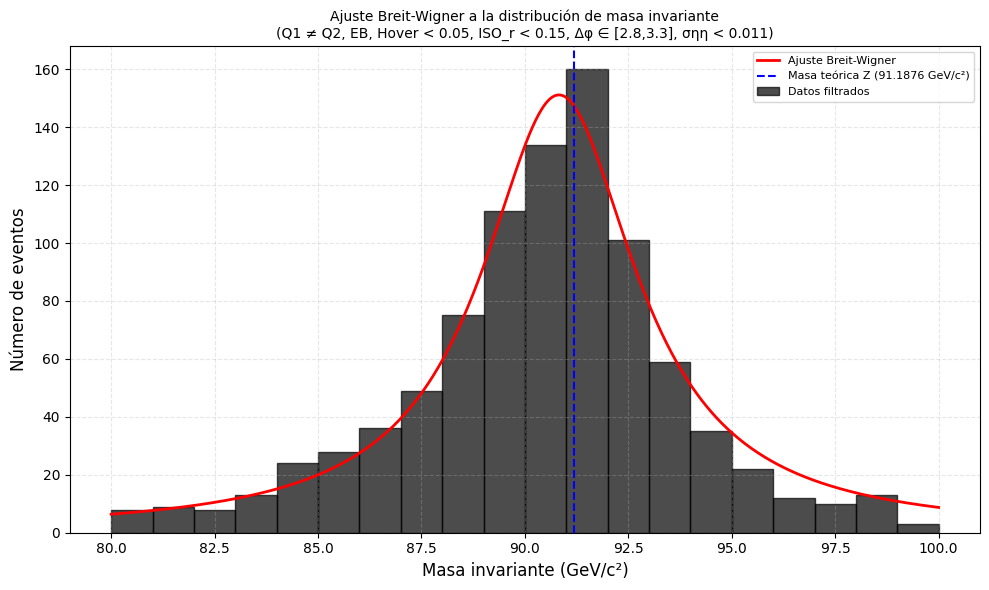

In [ ]:
#ACOTANDO DATA
import numpy as np

# Calcular la masa invariante para estos eventos
MI = np.sqrt(
    2 * F_ETAETA['pt1'] * F_ETAETA['pt2'] *
    (np.cosh(F_ETAETA['eta1'] - F_ETAETA['eta2']) -
     np.cos(F_ETAETA['phi1'] - F_ETAETA['phi2']))
)

FINAL = F_ETAETA[
    (MI < 100) &
    (MI > 80)
]

MF = np.sqrt(
    2 * FINAL['pt1'] * FINAL['pt2'] *
    (np.cosh(FINAL['eta1'] - FINAL['eta2']) -
     np.cos(FINAL['phi1'] - FINAL['phi2']))
)
print(FINAL)
# Mostrar el número de eventos que cumplen el criterio
print(f"Número de eventos con Q1 ≠ Q2, EB, Hover < 0.1 y ISO_r < 0.15 y BtB in [2.8,3.3]: {len(FINAL)}")

MFF = np.round(MF)

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def breit_wigner(M, A, M_Z, Gamma):
    # Corrected Breit-Wigner function with proper normalization factor
    return A * Gamma / ((M - M_Z)**2 + (Gamma/2)**2)

# Data for the histogram (from previous steps, using M_i6)
masas = MF
bin_w = 0.5
lo_edge = np.floor(masas.min() / bin_w) * bin_w
hi_edge = np.ceil(masas.max() / bin_w) * bin_w
bins = np.arange(lo_edge, hi_edge + bin_w, bin_w)

# Calculate counts and bin edges using numpy.histogram
counts, edges = np.histogram(masas, bins=bins)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Calculate statistical errors (Poisson: sqrt(N))
errors = np.sqrt(counts)

# Apply the mask consistently
mask = (bin_centers > 85) & (bin_centers < 95)
x_fit = bin_centers[mask]
y_fit = counts[mask]
sigma = errors[mask]

# Values iniciales para el ajuste (A, M_Z, Gamma)
# Adjust initial guess based on the filtered data
initial_guess = [y_fit.max(), 91.1876, 2.4952]

# Aplicar curve_fit (omitir bins with counts=0 for stability is handled by the mask)
params, covariance = curve_fit(
    breit_wigner,
    x_fit,
    y_fit,
    p0=initial_guess,
    sigma=sigma  # Usar errores estadísticos como pesos
)

# Parámetros obtenidos
A_fit, M_Z_fit, Gamma_fit = params
# Calculate standard deviations from the covariance matrix
perr = np.sqrt(np.diag(covariance))
dA_fit, dM_Z_fit, dGamma_fit = perr

print(f"Ajuste Breit-Wigner: A = {A_fit:.2f} ± {dA_fit:.2f}, M_Z = {M_Z_fit:.2f} ± {dM_Z_fit:.2f} GeV/c², Γ = {Gamma_fit:.2f} ± {dGamma_fit:.2f} GeV")

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bins),
       color='black', edgecolor='black', alpha=0.7,
       label='Datos filtrados')

# Línea del ajuste Breit-Wigner
M_range = np.linspace(bins[0], bins[-1], 500)
plt.plot(M_range, breit_wigner(M_range, *params),
        'r-', linewidth=2, label='Ajuste Breit-Wigner')

# Línea de la masa teórica del Z
plt.axvline(91.1876, color='blue', linestyle='dashed', linewidth=1.5,
           label='Masa teórica Z (91.1876 GeV/c²)')

# Personalización
plt.xlabel('Masa invariante (GeV/c²)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title('Ajuste Breit-Wigner a la distribución de masa invariante\n' +
          '(Q1 ≠ Q2, EB, Hover < 0.05, ISO_r < 0.15, Δφ ∈ [2.9,3.2], σηη < 0.011)', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()